In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
from ExperienceReplayBuffer import ExperienceReplayBuffer
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


In [3]:
state_values = np.array([random.random() for i in range(25)])
learning_rate = 0.01
gamma = 0.99

# 在8.2.1基础上添加了神经网络，效果一般

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 定义一个继承自nn.Module的神经网络模型类
class model(nn.Module):
    """
    一个简单的神经网络模型，用于拟合状态值。

    该模型包含三个全连接层，输入维度为2，经过两个隐藏层后输出一个标量值。
    """
    def __init__(self):
        # 调用父类nn.Module的构造函数
        super(model, self).__init__()
        # 定义第一个全连接层，输入维度为2，输出维度为128
        self.fc1 = nn.Linear(2,128)
        # 定义第二个全连接层，输入维度为128，输出维度为64
        self.fc2 = nn.Linear(128,64)
        # 定义第三个全连接层，输入维度为64，输出维度为1，用于拟合状态值
        self.fc3 = nn.Linear(64,1)  # 拟合的state value，一个输出即可

    def forward(self, state):
        """
        定义模型的前向传播过程。

        参数:
            state (torch.Tensor): 输入的状态张量，维度为(batch_size, 2)。2是代表行和列的索引。

        返回:
            torch.Tensor: 输出的状态值张量。
        """
        # 将输入状态通过第一个全连接层
        h1 = self.fc1(state)
        # 对第一个全连接层的输出应用ReLU激活函数
        h1 = F.relu(h1)
        # 将第一个隐藏层的输出通过第二个全连接层
        h2 = self.fc2(h1)
        # 对第二个全连接层的输出应用ReLU激活函数
        h2 = F.relu(h2)
        # 将第二个隐藏层的输出通过第三个全连接层得到最终的状态值
        Q = self.fc3(h2)
        return Q


In [5]:
experiencePool = ExperienceReplayBuffer(max_size=10000)
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]
for trajectory in episodes:
    for exp in trajectory:
        experiencePool.add_expericence(exp)

In [6]:
lr = 0.001
network = model()
optimizer = optim.Adam(network.parameters(), lr = lr)
batch_size = 100

In [7]:
batch = experiencePool.sample_batch(batch_size=batch_size)
tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = batch

In [ ]:
tmpstate = tmpstate.reshape(batch_size,1)
tmpstate = np.hstack((tmpstate // 5, tmpstate % 5))  #将state变成了行列，目的是为了方便后面的神经网络输入


In [9]:
tmpstate.shape

(100, 2)

In [10]:
tmpstate[:5]

array([[0, 0],
       [1, 1],
       [4, 3],
       [1, 0],
       [3, 1]], dtype=int32)

  0%|          | 0/100000 [00:00<?, ?it/s]

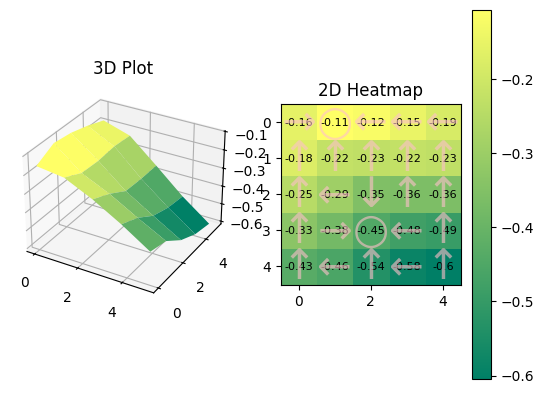

  2%|▏         | 1971/100000 [00:03<02:22, 687.29it/s]

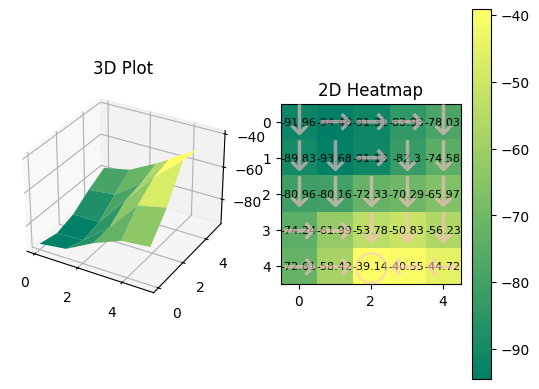

  4%|▍         | 3958/100000 [00:06<02:06, 758.36it/s]

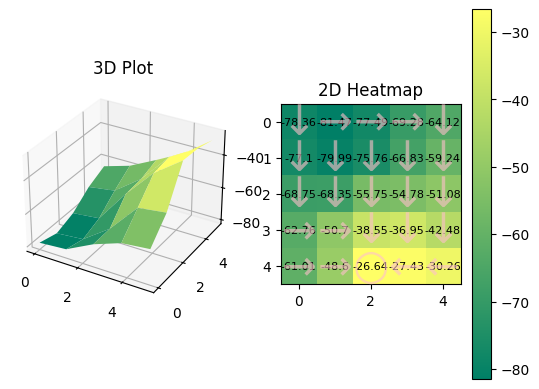

  6%|▌         | 5990/100000 [00:09<02:18, 677.13it/s]

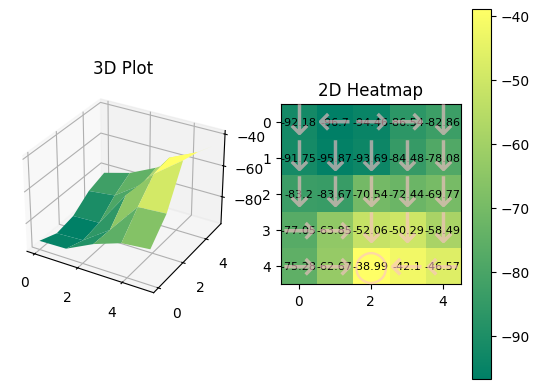

  8%|▊         | 7998/100000 [00:12<02:08, 715.06it/s]

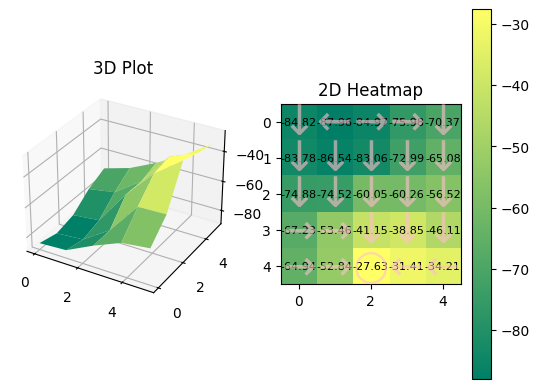

 10%|▉         | 9984/100000 [00:14<02:02, 735.49it/s]

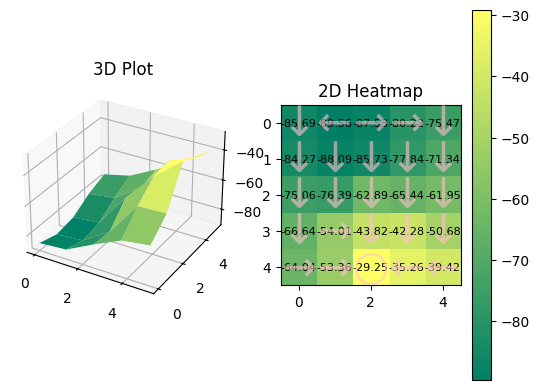

 12%|█▏        | 11987/100000 [00:17<01:56, 754.58it/s]

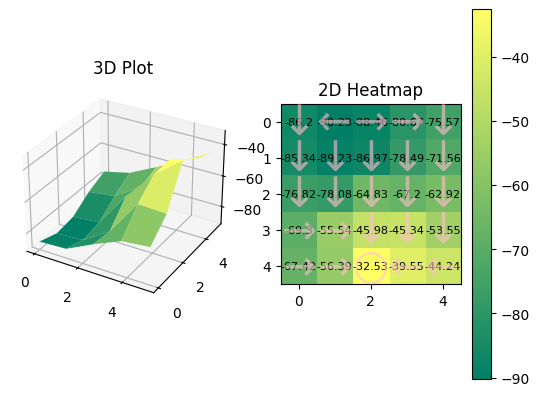

 14%|█▍        | 13961/100000 [00:20<01:55, 743.73it/s]

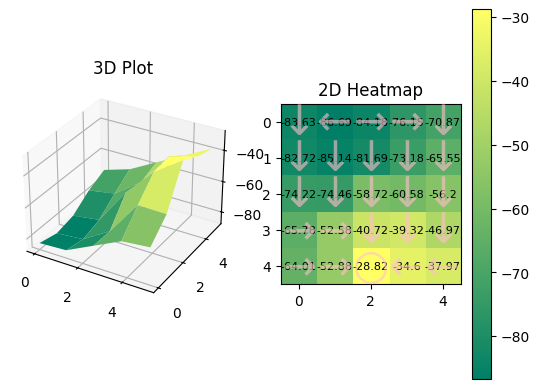

 16%|█▌        | 15949/100000 [00:23<01:50, 758.58it/s]

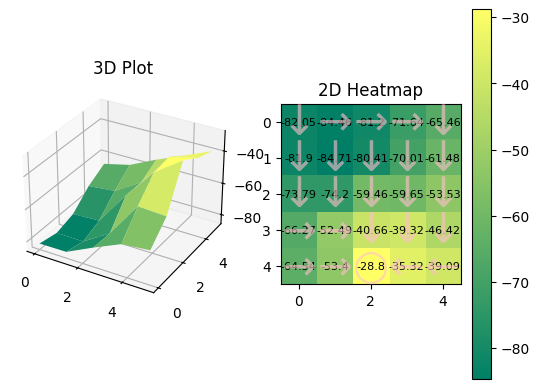

 18%|█▊        | 17956/100000 [00:26<01:48, 756.68it/s]

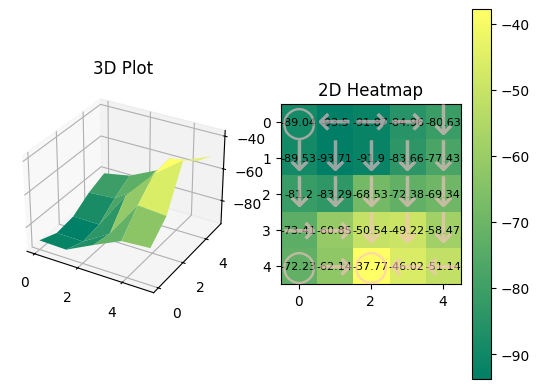

 20%|█▉        | 19984/100000 [00:29<01:47, 745.38it/s]

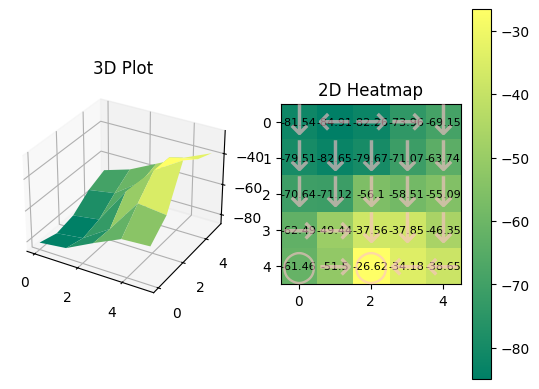

 22%|██▏       | 21979/100000 [00:32<01:45, 737.11it/s]

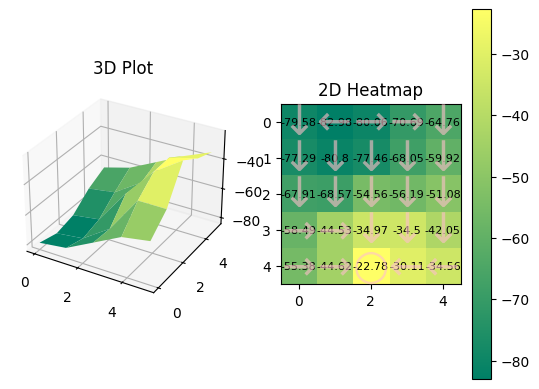

 24%|██▍       | 23988/100000 [00:35<01:43, 733.40it/s]

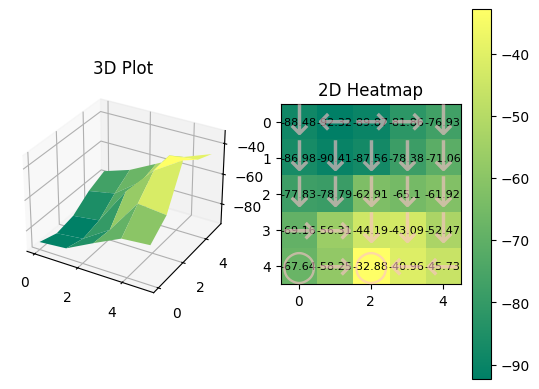

 26%|██▌       | 25931/100000 [00:38<01:39, 744.11it/s]

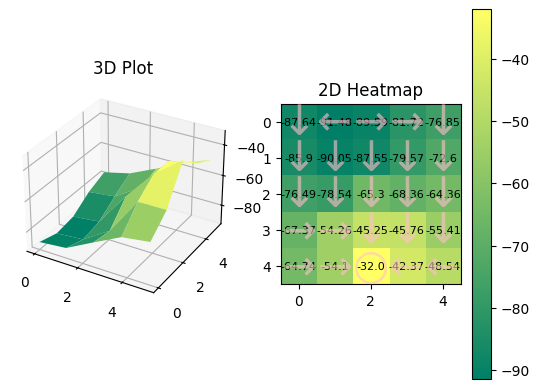

 28%|██▊       | 27957/100000 [00:41<01:42, 705.88it/s]

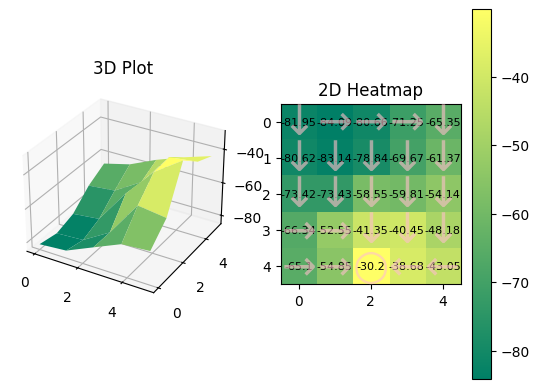

 30%|██▉       | 29942/100000 [00:44<01:41, 689.74it/s]

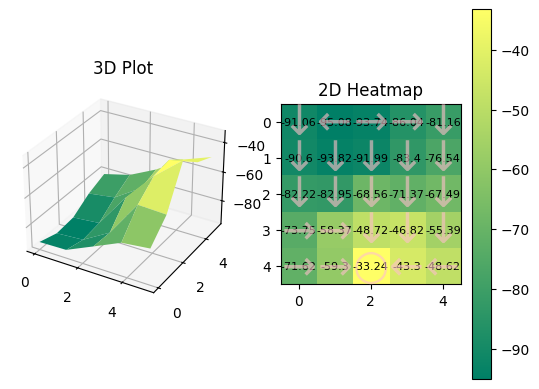

 32%|███▏      | 31976/100000 [00:47<01:36, 704.85it/s]

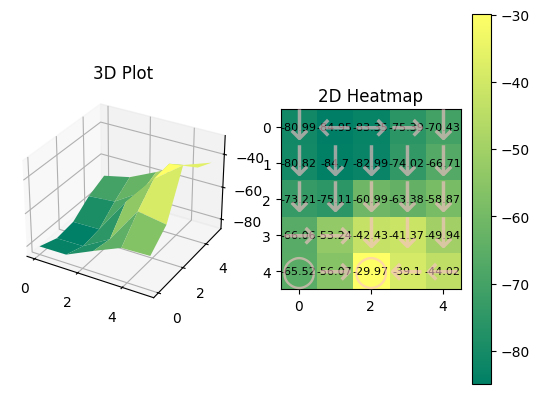

 34%|███▍      | 33994/100000 [00:50<01:27, 752.42it/s]

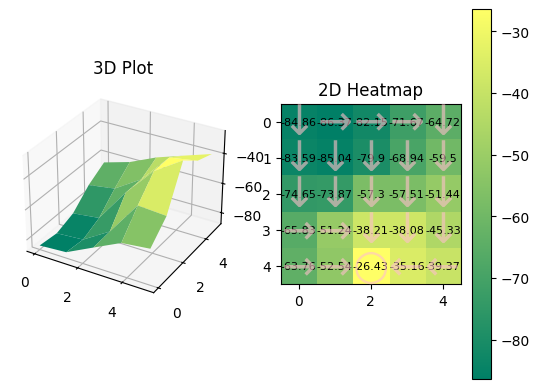

 36%|███▌      | 35960/100000 [00:53<01:26, 744.57it/s]

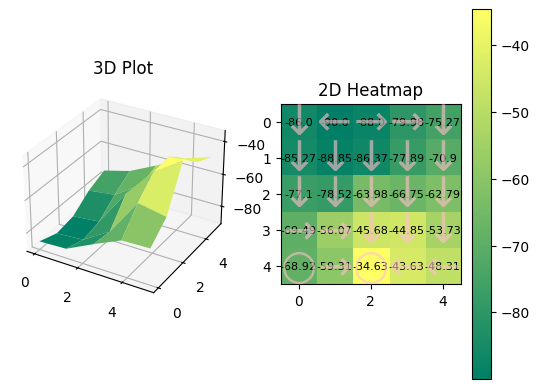

 38%|███▊      | 37985/100000 [00:56<01:22, 754.72it/s]

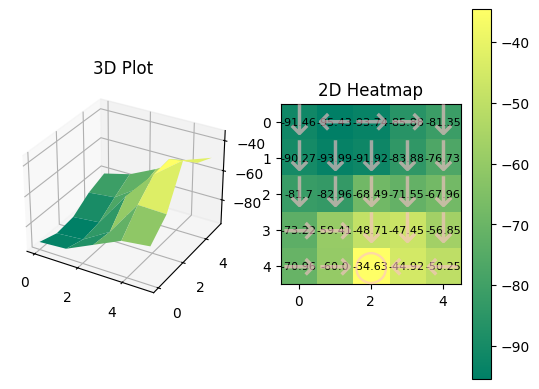

 40%|███▉      | 39946/100000 [00:59<01:26, 693.29it/s]

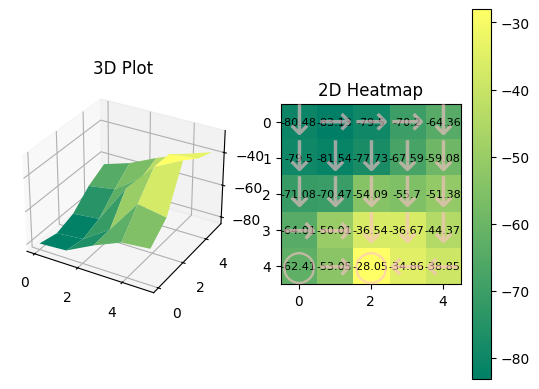

 42%|████▏     | 41937/100000 [01:02<01:21, 708.55it/s]

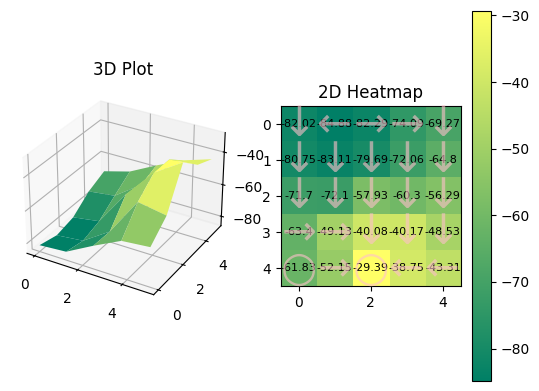

 44%|████▍     | 44000/100000 [01:05<01:15, 740.60it/s]

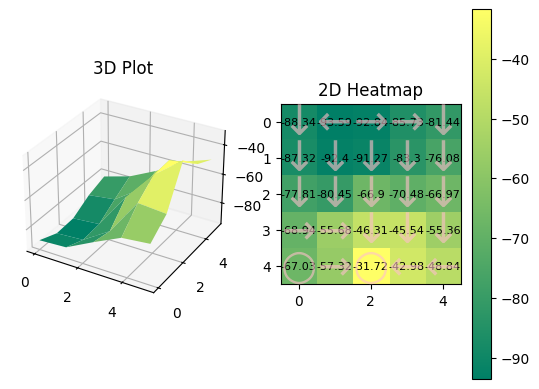

 46%|████▌     | 45947/100000 [01:08<01:12, 746.64it/s]

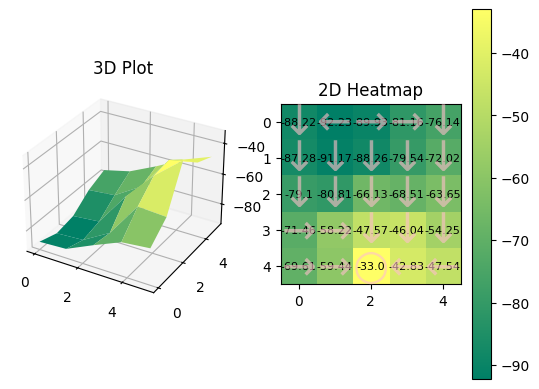

 48%|████▊     | 47999/100000 [01:11<01:15, 688.29it/s]

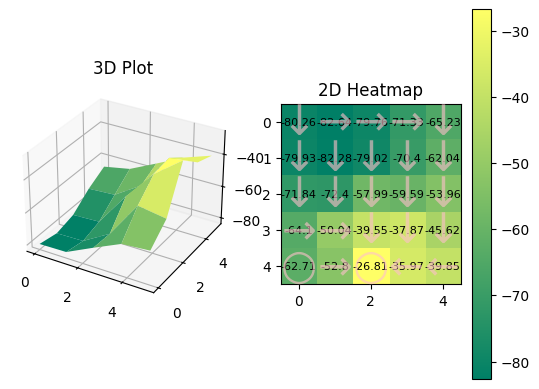

 50%|████▉     | 49941/100000 [01:13<01:06, 757.75it/s]

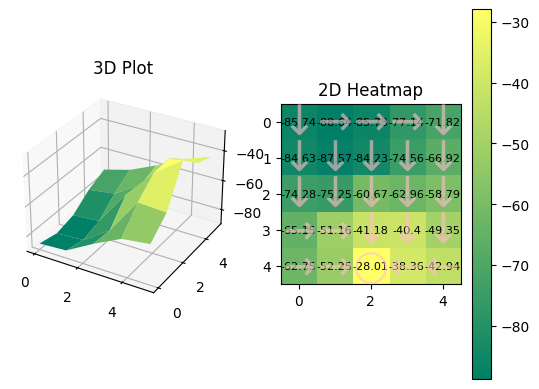

 52%|█████▏    | 51978/100000 [01:16<01:04, 749.13it/s]

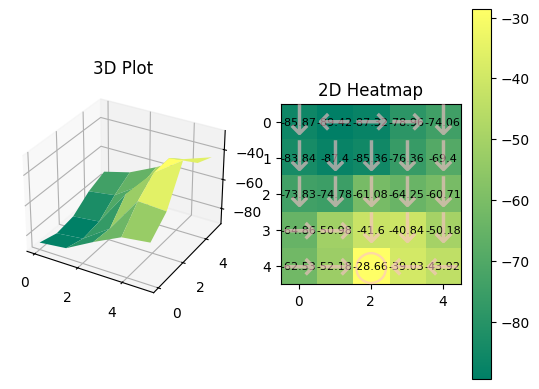

 54%|█████▍    | 53989/100000 [01:19<01:00, 755.28it/s]

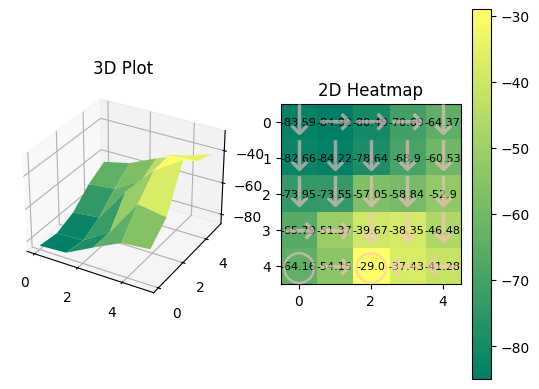

 56%|█████▌    | 55933/100000 [01:22<00:56, 775.00it/s]

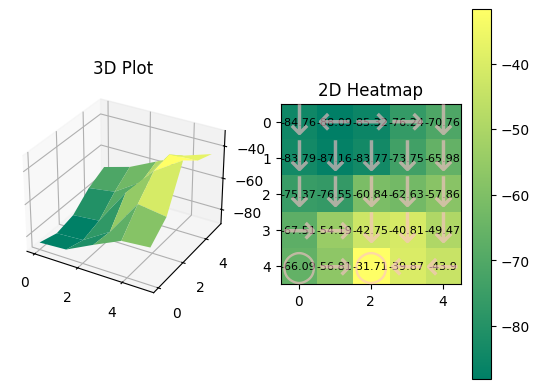

 58%|█████▊    | 57981/100000 [01:25<01:03, 665.51it/s]

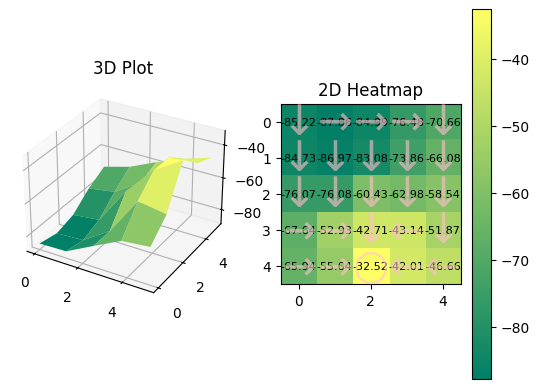

 60%|█████▉    | 59953/100000 [01:28<00:53, 742.67it/s]

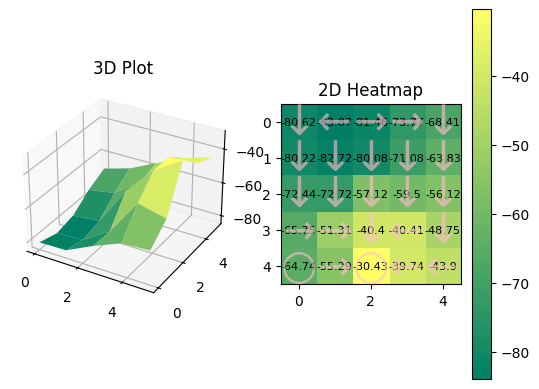

 62%|██████▏   | 61954/100000 [01:31<00:58, 649.40it/s]

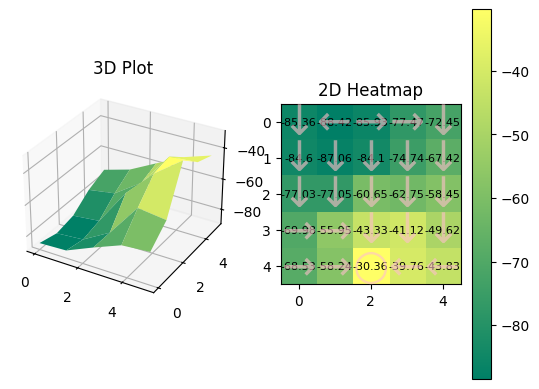

 64%|██████▍   | 63948/100000 [01:34<00:53, 674.34it/s]

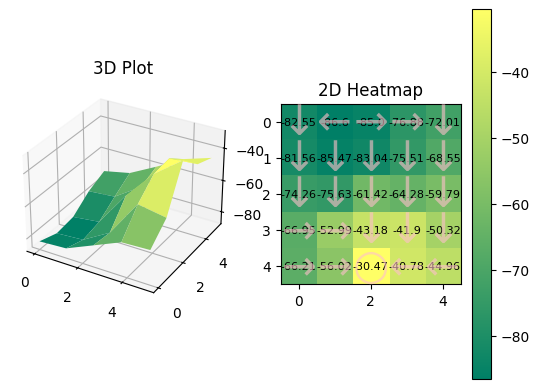

 66%|██████▌   | 65991/100000 [01:37<00:49, 684.46it/s]

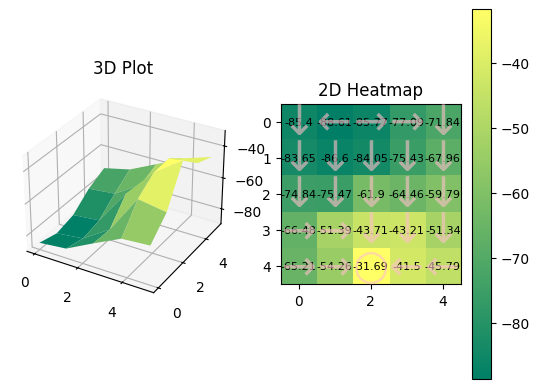

 68%|██████▊   | 67931/100000 [01:40<00:44, 716.78it/s]

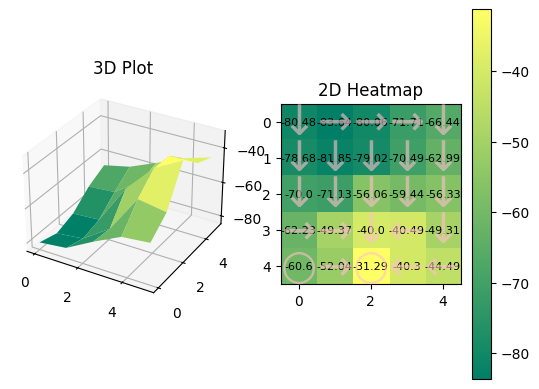

 70%|███████   | 70000/100000 [01:43<00:44, 667.88it/s]

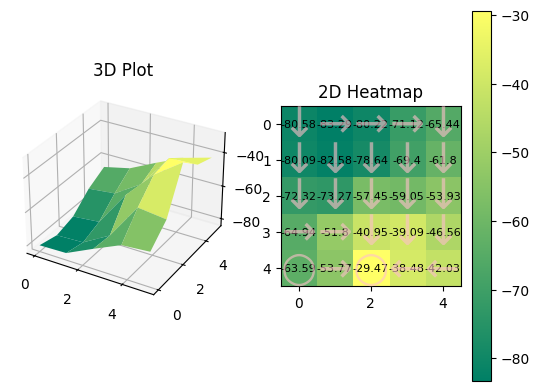

 72%|███████▏  | 71963/100000 [01:46<00:39, 706.61it/s]

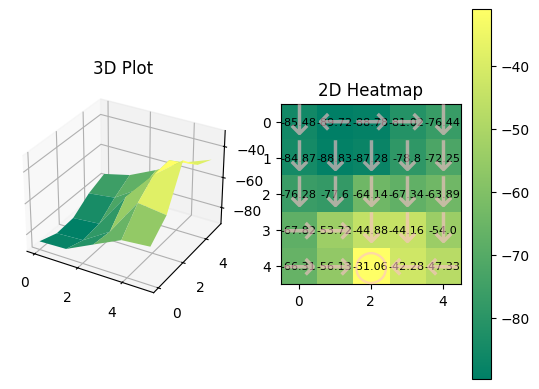

 74%|███████▍  | 73953/100000 [01:50<00:37, 689.57it/s]

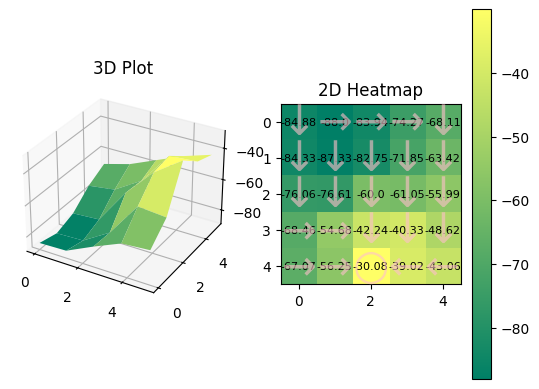

 76%|███████▌  | 75976/100000 [01:53<00:34, 702.64it/s]

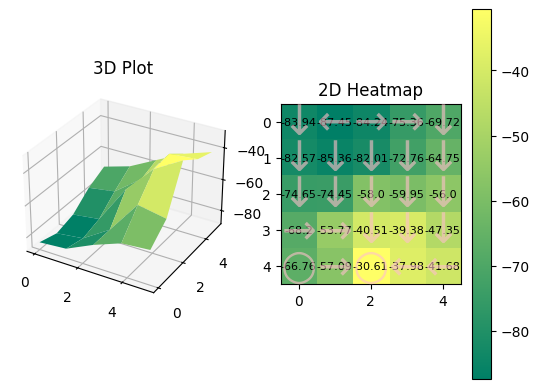

 78%|███████▊  | 77949/100000 [01:56<00:34, 630.18it/s]

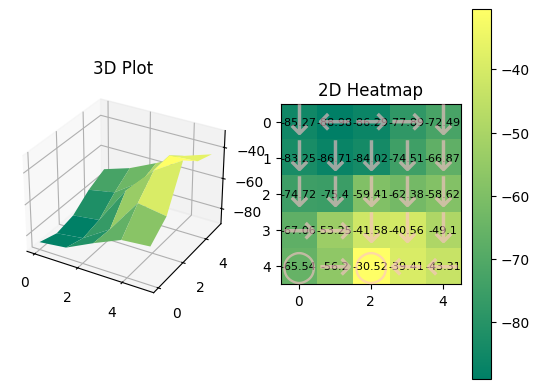

 80%|███████▉  | 79972/100000 [02:00<00:34, 584.29it/s]

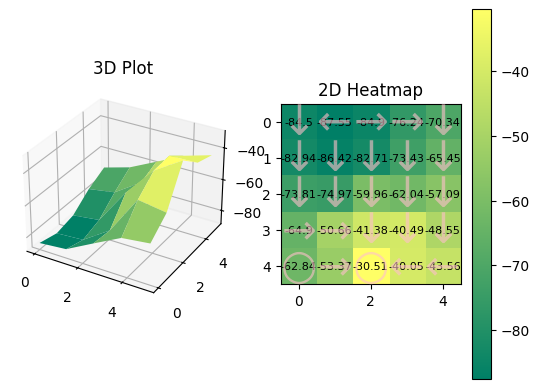

 82%|████████▏ | 81978/100000 [02:03<00:28, 632.08it/s]

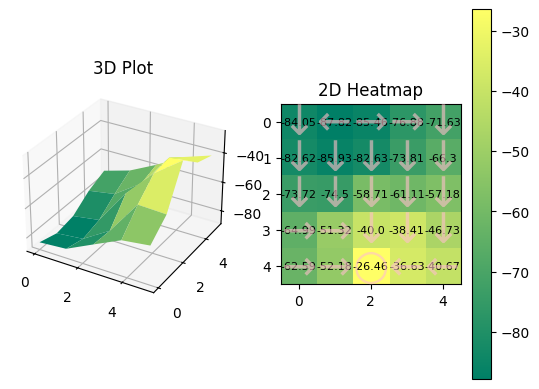

 84%|████████▍ | 83959/100000 [02:07<00:28, 568.76it/s]

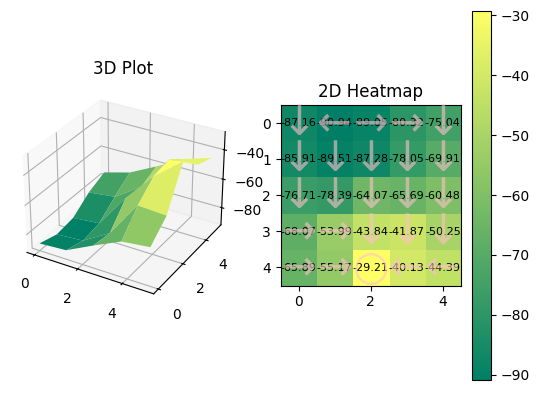

 86%|████████▌ | 85959/100000 [02:11<00:23, 600.72it/s]

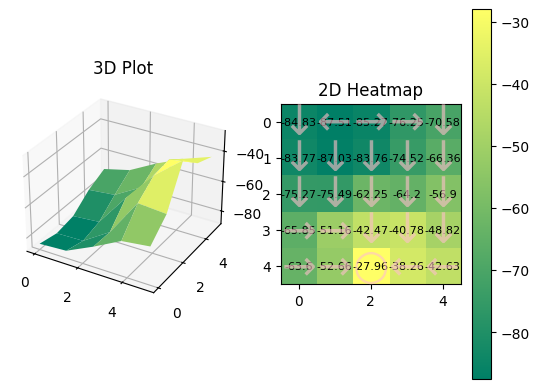

 88%|████████▊ | 87962/100000 [02:14<00:17, 675.86it/s]

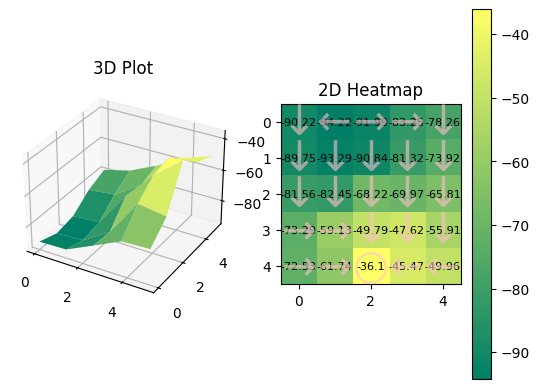

 90%|████████▉ | 89985/100000 [02:18<00:15, 647.34it/s]

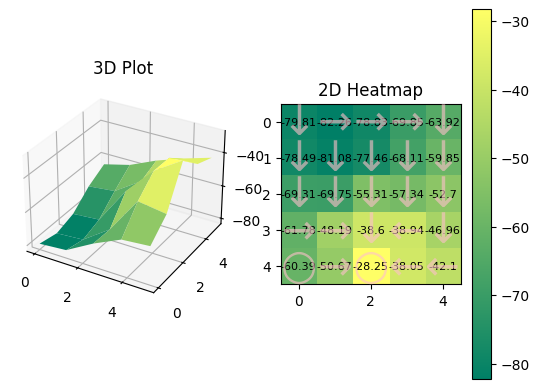

 92%|█████████▏| 91987/100000 [02:21<00:16, 478.28it/s]

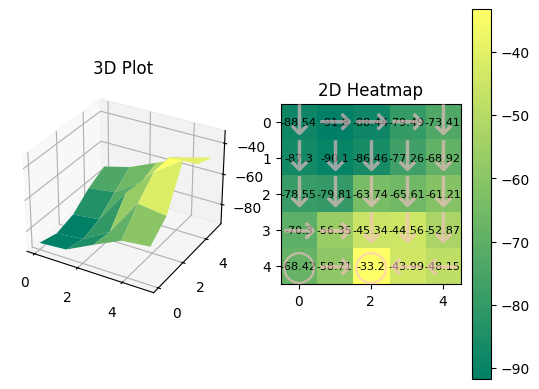

 94%|█████████▍| 93949/100000 [02:25<00:08, 672.99it/s]

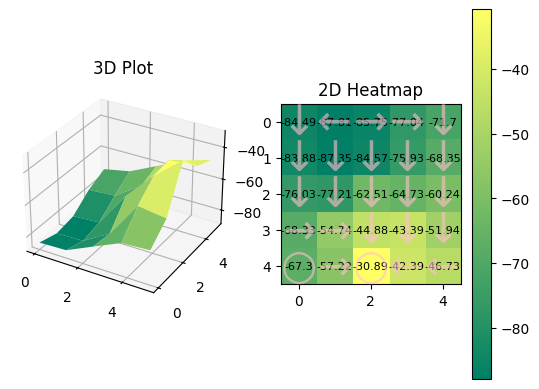

 96%|█████████▌| 95935/100000 [02:28<00:05, 695.06it/s]

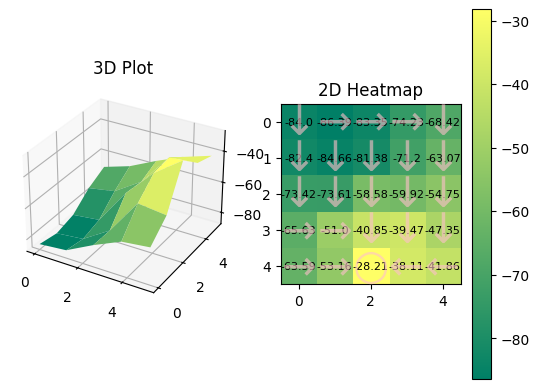

 98%|█████████▊| 97950/100000 [02:31<00:02, 734.26it/s]

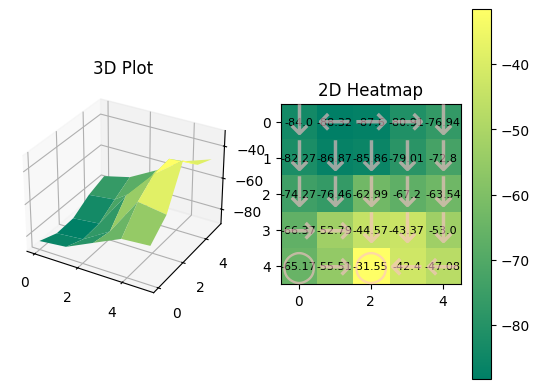

100%|██████████| 100000/100000 [02:34<00:00, 648.05it/s]


In [11]:
# 循环 100000 次，使用 tqdm 库显示进度条
for _ in tqdm.tqdm(range(100000)):
    # 清空优化器中的梯度信息，避免梯度累积
    optimizer.zero_grad()
    # 从经验池 experiencePool 中随机采样一个批次的数据，批次大小为 batch_size
    batch = experiencePool.sample_batch(batch_size=batch_size)
    # 解包采样得到的批次数据
    tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = batch

    # 将当前状态数据重塑为形状为 (batch_size, 1) 的数组
    tmpstate = tmpstate.reshape(batch_size,1)
    # 将状态转换为行列形式，通过整除和取余操作
    tmpstate = np.hstack((tmpstate // 5, tmpstate % 5))  #将state变成了行列,(bs,2)
    # 将下一个状态数据重塑为形状为 (batch_size, 1) 的数组
    nextState = nextState.reshape(batch_size,1)
    # 将下一个状态转换为行列形式，通过整除和取余操作，所以变为2个元素
    nextState = np.hstack((nextState // 5, nextState % 5))  #将state变成了行列(bs,2)

    # 将当前状态数组转换为 PyTorch 张量，数据类型为 float32，并调整形状为 (batch_size, 2)
    tmpstate = torch.tensor(tmpstate,dtype = torch.float32).view(batch_size,2)
    # 将下一个状态数组转换为 PyTorch 张量，数据类型为 float32，并调整形状为 (batch_size, 2)
    nextState = torch.tensor(nextState,dtype = torch.float32).view(batch_size,2)

    # 将当前动作数组转换为 PyTorch 张量，数据类型为 int，并调整形状为 (batch_size, 1)
    tmpaction = torch.tensor(tmpaction,dtype = torch.int).view(batch_size,1)
    # 将下一个动作数组转换为 PyTorch 张量，数据类型为 int，并调整形状为 (batch_size, 1)
    nextAction = torch.tensor(nextAction,dtype = torch.int).view(batch_size,1)

    # 将当前得分数组转换为 PyTorch 张量，数据类型为 float32，并调整形状为 (batch_size, 1)
    tmpscore = torch.tensor(tmpscore,dtype = torch.float32).view(batch_size,1)
    # 将终止标志数组转换为 PyTorch 张量，数据类型为 float32，并调整形状为 (batch_size, 1)
    terminal = torch.tensor(terminal,dtype = torch.float32).view(batch_size,1)

    #为什么这里用 torch.no_grad()，为了冻住模型，认为Vπ（St)是常数，所以不需要计算梯度，target就是Vπ（St)
    with torch.no_grad():
        # 通过神经网络 network 计算下一个状态的值
        next_state_value = network(nextState)  #网络
        # 根据贝尔曼方程计算目标值
        target = tmpscore + (1.0 - terminal) * gamma * next_state_value
    
    # 通过神经网络 network 计算当前状态的值
    now_state_value = network(tmpstate)    #网络
    
    # 计算当前状态值和目标值之间的均方误差损失
    loss = F.mse_loss(now_state_value, target)
    # 反向传播计算梯度
    loss.backward()
    # 优化器根据计算得到的梯度更新神经网络的参数
    optimizer.step()
            
    # 每 2000 次迭代执行一次以下操作
    if _ % 2000 == 0:
        # 生成一个包含 0 到 24 的状态数组
        s = np.array([[i] for i in range(25)])
        # 将状态数组转换为行列形式
        s = np.hstack((s // 5, s % 5))
        # 将状态数组转换为 PyTorch 张量，数据类型为 float32，并调整形状为 (25, 2)
        states = torch.tensor(s, dtype = torch.float32).view(25,2)
        # 通过神经网络计算状态值，并将结果转换为 numpy 数组
        state_values = network(states).view(-1).detach().numpy()  # 还原成state_values
        
        # 初始化动作值数组，填充随机值
        action_values = np.random.rand(25,5)
        # 遍历每个状态和动作，计算动作值
        for i in range(25):
            for j in range(5):
                # 从环境 gridworld 中获取得分和下一个状态
                score, nextState = gridworld.getScore(i,j)
                # 根据贝尔曼方程计算动作值
                action_values[i][j] = score + gamma * state_values[nextState]
        
        # 找出每个状态下动作值最大的动作索引
        p = np.argmax(action_values,axis=1)
        # 绘制状态值和最优动作
        draw(state_values.reshape(5,5), p)